#### Hello Everyone welcome to the fascinating world of clusters. In this notebook I will be explaining 3 Main clustering algorithms that are K-Means, HAC and DBSCAN. So let's get started

## <p style="padding:10px;background-color:#17EAAE;margin:0;color:#F51033;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">K-Means Clustering</p>

#### What is K-Means Clustering?

- The idea behind K-means clustering is to divide a dataset into a specified number of clusters (k), where all the points within the same cluster are similar to one another, and those in different clusters are different.

- It starts by randomly assigning each data point to a cluster, and then it iteratively improves the clusters by moving the data points to the cluster center that is closest to them. This logic continues until the cluster assignments stop changing, or a maximum number of iterations is reached.



#### How K-Means Clustering works?
It mainly works in 5 steps -
- Specify the Number of Clusters "k"
- Randomly initialize the cluster centroids
- Assign each data point to the closest cluster center 
- Recompute the cluster's center as mean of all data in the cluster
- Repeat steps 3 and 4 until the cluster assignment stop changing /maximum iteration is reached

Here is an visual illustration of K-means where the convergence is reached at the 14th iteration - 
![](https://miro.medium.com/v2/resize:fit:786/format:webp/0*bIxukfJwM4Yx1w_Y.gif)

#### Here is how it works in Code -

In [23]:
# import required libraries
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

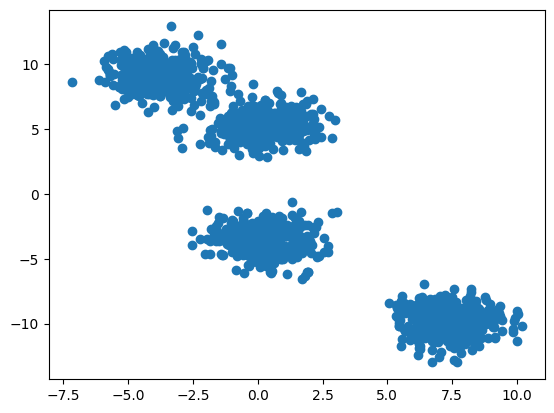

In [48]:
# create a sample dataset with 3 clusters
X,y = make_blobs(n_samples=1500,centers=4, n_features=2, random_state= 14)
plt.scatter(X[:,0],X[:,1])

In [57]:
# create the KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4)
# fit the model to the data
kmeans.fit(X)

KMeans(n_clusters=4)

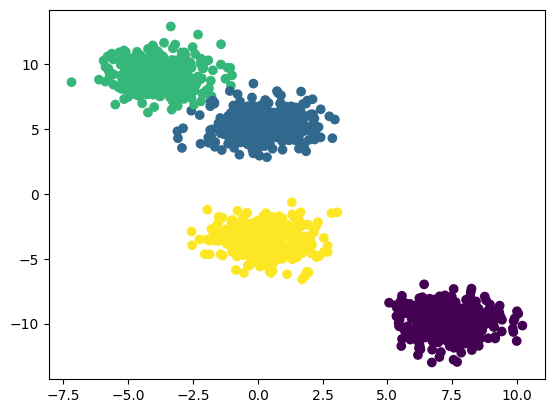

In [51]:
# predict the clusters for each data point
predictions = kmeans.predict(X)
plt.scatter(X[:,0],X[:,1],c=predictions)

You must be thinking "but with what value we should initialize k". For that we use something called as WCSS (with-in cluster sum of squares) value. The Within-Cluster Sum of Squares (WCSS) is a metric used to evaluate the compactness of clusters in a dataset, helping to identify an optimal number of clusters for more effective data segmentation.

In [52]:
# Find the best K value with WCSS score
wcss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

After getting wcss scores for multiples k values if we plot an elbow graph, we will be able to find the best k value by seeing the graph.

The elbow method is a technique used in clustering analysis to determine the optimal number of clusters. It involves plotting the within-cluster sum of squares (WCSS) for different cluster numbers and identifying the “elbow” point where WCSS starts to level off.

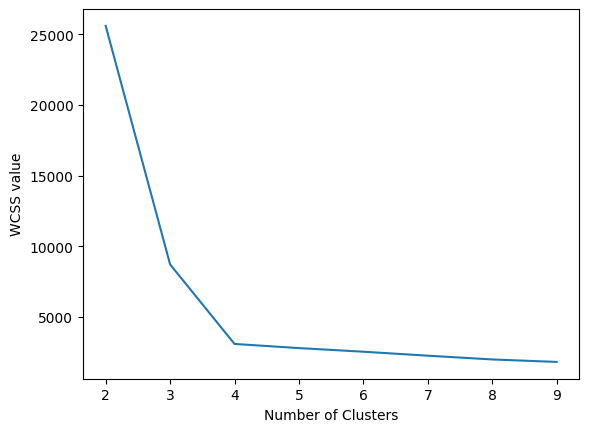

In [60]:
# Elbow curve clearly showing the best k value
plt.plot(range(2,10),wcss)
plt.xticks(range(2,10))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS value")
plt.show()

# From the graph you will be able to see that after k value of the line has become stable. 
# That means 4 is the best k value in this case  

## <p style="padding:10px;background-color:#17EAAE;margin:0;color:#F51033;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Hierarchical Agglomerative Clustering</p>

Hierarchical clustering is a family of clustering algorithms that build a hierarchy of clusters, allowing users to understand the data structure at various granularity levels.

Though are two types of Hierarchical clustering - Agglomerative(bottom-up approach) and Divisive(top-down approach) Clustering, but I will only be showing the Agglomerative as the other one just does everything in a reversive fashion.
#### What is Hierarchical Agglomerative Clustering?

- Agglomerative clustering (bottom-up approach) starts with each data point as a separate cluster, and in each successive step merges the two clusters that are closest to each other. This process continues until all data points are in a single cluster.

The results of hierarchical clustering are usually presented in a dendrogram. 
- A dendrogram is a tree-like structure that shows the sequence in which clusters were merged (or split) and the distance at which each merge (or split) took place. It is useful for understanding the structure of the data and for determining the desired number of clusters in the final output.

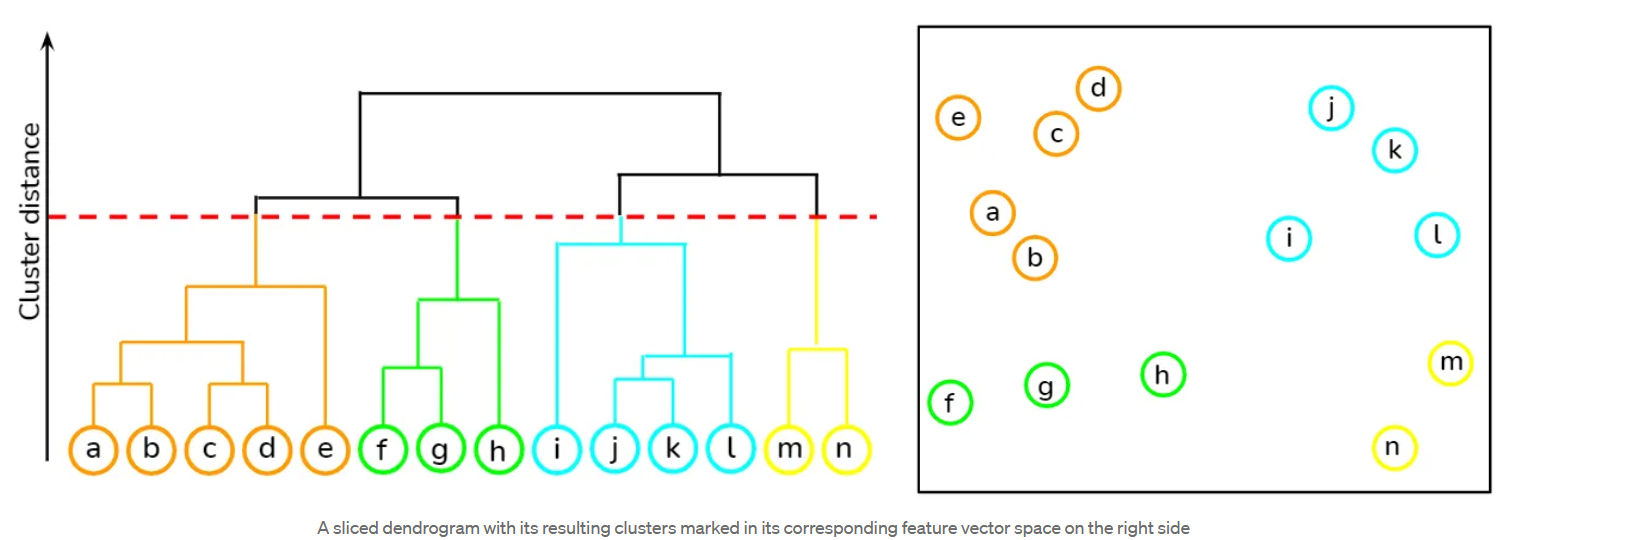

#### Number of clusters
In hierarchical clustering, while constructing the dendrogram, we do not keep any assumption on the number of clusters. Once the dendrogram has been constructed, we slice this structure horizontally. All the resulting child branches formed below the horizontal cut represent an individual cluster at the highest level in your system and it defines the associated cluster membership for each data sample. Note we are saying it as the highest level because even after you have created the clusters, you are still aware of what would be the relationship within the subsequent subclusters that can still be formed and you always have an option to increase/decrease the granularity level of clustering.

Dendrograms however do not do proper justice to understand how the clusters will look like after you place the horizontal cut. You have to individually mark the data points in a feature vector space with the resulting cluster indexes to visually see the effect of clustering.

Here is an example of how we can perform HAC in code -

In [78]:
# Importing the libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sc

iris =pd.DataFrame(load_iris().data)

In [75]:
# Scaling the data
scaler = StandardScaler()
scaled_iris = scaler.fit_transform(iris)

In [72]:
# Applying PCA to reduce dimensions to 2
pca =PCA(n_components=2)
data = pca.fit_transform(scaled_iris)

In [73]:
data.shape

(150, 2)

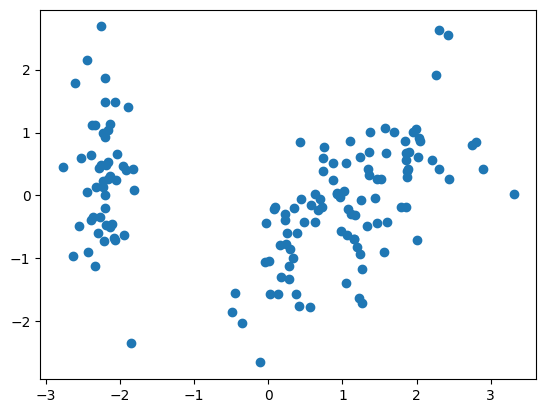

In [74]:
plt.scatter(data[:,0],data[:,1])

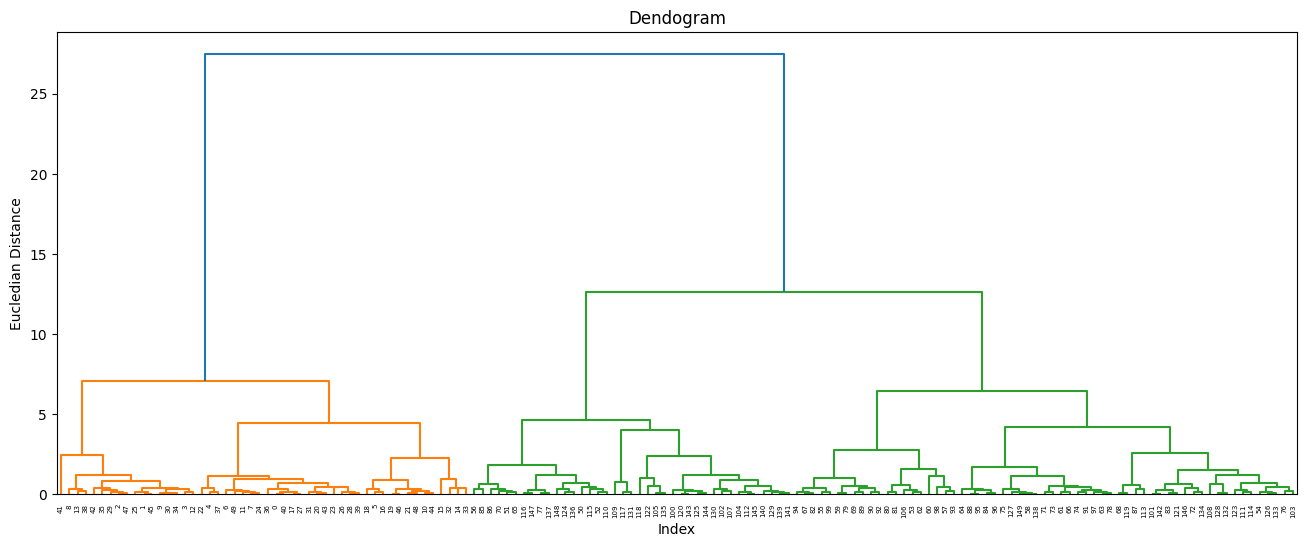

In [77]:
# Agglomerative Clustering to construct a Dendogram
plt.figure(figsize=(16,6))
plt.title("Dendogram")

# Create Dendogram
sc.dendrogram(sc.linkage(data,method='ward'))
plt.title("Dendogram")
plt.xlabel("Index")
plt.ylabel("Euclidian Distance")
plt.show()

In order to decide which clusters to combine (or split), we need a measure of distance between two sets of points (clusters).

- A linkage method (or criterion) specifies how distances between clusters are calculated. Ward is one of the Linkage Methods 
Ward Method defines the distance between two clusters as the increase in the within-cluster sum of squared distances (WCSS) when the two clusters are merged.
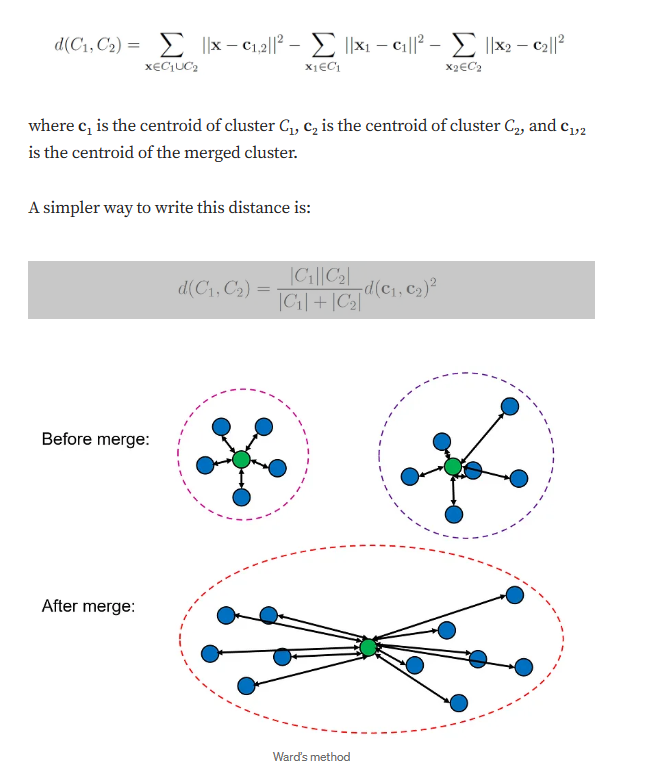

In [80]:
# After performing the Horizontal cut we can clearly see that we have 2 clusters in the data
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(data)

AgglomerativeClustering(affinity='euclidean')

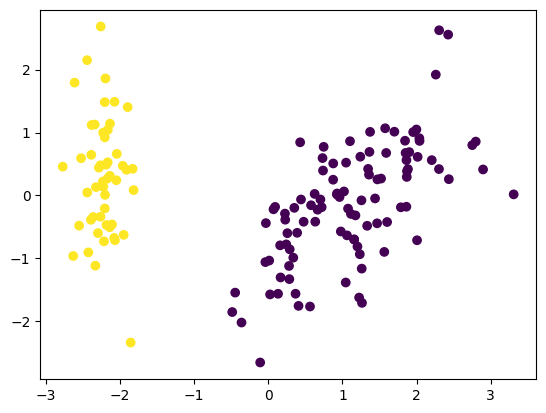

In [81]:
plt.scatter(data[:,0],data[:,1],c=cluster.labels_)

## <p style="padding:10px;background-color:#17EAAE;margin:0;color:#F51033;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">DBSCAN</p>

The concept behind DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is in its name itself — it’s a density-based clustering algorithm. Unlike K-Means, which partitions data into spherical clusters and can misinterpret outliers as small clusters, DBSCAN locates regions of high density and separates them from regions of low density.

#### DBSCAN is a remarkable clustering algorithm that doesn’t rely on predefining the number of clusters, making it particularly well-suited for finding clusters of varying shapes and sizes in your data.

#### Here’s how DBSCAN works:

- Density-Centered Clustering: DBSCAN identifies clusters by looking at the density of data points. It defines a cluster as a dense region of data points that is separated by areas of lower point density.
- Core Points: The algorithm starts by selecting a random data point and examines its neighborhood within a specified radius (epsilon, ε). If there are at least a minimum number of data points (minPts) within this neighborhood, it marks the central point as a “core point.”
- Growing Clusters: DBSCAN then expands the cluster around this core point by recursively adding nearby points that are also core points. This process continues until no more core points can be added.
- Border Points: Any data points that are within the neighborhood of a core point but don’t meet the density criteria to be core points themselves are considered “border points” and are assigned to the nearest cluster.
- Noise: Data points that are not core points or border points and are not within the neighborhood of any core points are treated as noise and do not belong to any cluster.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/600px-DBSCAN-Illustration.svg.png)

In the illustration above Red ones are the Core points, Yellow ones are Border points and Blue one is the Noise

In [98]:
# Importing Libraries
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [95]:
X,y = make_moons(n_samples=500,noise = 0.06)

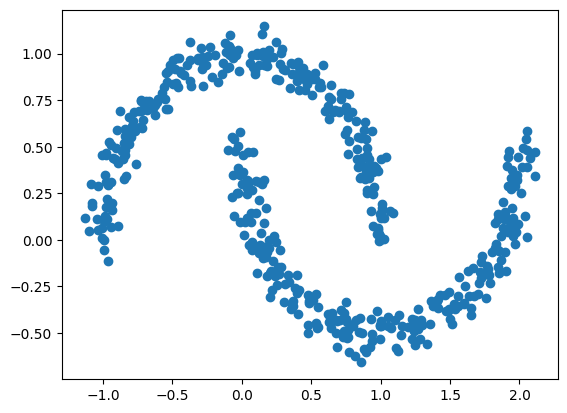

In [96]:
plt.scatter(X[:,0],X[:,1])

In [97]:
# Scaling the data
X_scaled = scaler.fit_transform(X)

In [100]:
db = DBSCAN(eps = 0.5)
db.fit(X_scaled)

DBSCAN()

In [103]:
db.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,

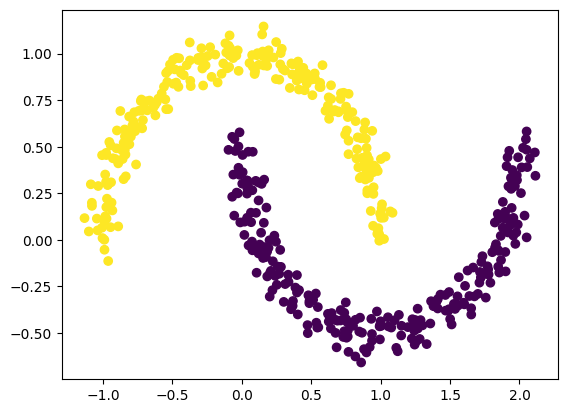

In [102]:
# I suggest you do this same clustering with K-means, it will give you only one cluster. This is where DBscan outperforms
plt.scatter(X[:,0],X[:,1],c=db.labels_)

### Thank you so much for reading the Notebook! Please do upvote if you found it helpful. Thank you see you in the next one
![](https://media2.giphy.com/media/xUPGcGlQw1fAxftrBS/giphy.gif?cid=ecf05e474g0ecyko1dvoze8ok2wmlutpenwhdam7sgbl0df2&ep=v1_gifs_search&rid=giphy.gif&ct=g)